In [1]:
#Example
#It will automatically download the CRISM dataset.
import os
import urllib.request

DDR_URL = "https://pds-geosciences.wustl.edu/mro/mro-m-crism-6-ddr-v1/mrocr_1001/ddr/2007/2007_029/hrl000040ff/hrl000040ff_07_de183l_ddr1.img"
DDR_LBL_URL = "https://pds-geosciences.wustl.edu/mro/mro-m-crism-6-ddr-v1/mrocr_1001/ddr/2007/2007_029/hrl000040ff/hrl000040ff_07_de183l_ddr1.lbl"
TRDR_URL = "https://pds-geosciences.wustl.edu/mro/mro-m-crism-3-rdr-targeted-v1/mrocr_2101/trdr/2007/2007_029/hrl000040ff/hrl000040ff_07_if183l_trr3.img"
TRDR_LBL_URL = "https://pds-geosciences.wustl.edu/mro/mro-m-crism-3-rdr-targeted-v1/mrocr_2101/trdr/2007/2007_029/hrl000040ff/hrl000040ff_07_if183l_trr3.lbl"

data = "data" 
os.makedirs(data, exist_ok=True)

# download data
TRDR_name = os.path.basename(TRDR_URL)

TRDR_path = os.path.join(data, os.path.basename(TRDR_URL))
TRDR_LBL_path = os.path.join(data, os.path.basename(TRDR_LBL_URL))
DDR_path = os.path.join(data, os.path.basename(DDR_URL))
DDR_LBL_path = os.path.join(data, os.path.basename(DDR_LBL_URL))


if not os.path.isfile(TRDR_path):
    urllib.request.urlretrieve(TRDR_URL, TRDR_path)
if not os.path.isfile(TRDR_LBL_path):
    urllib.request.urlretrieve(TRDR_LBL_URL, TRDR_LBL_path)
if not os.path.isfile(DDR_path):
    urllib.request.urlretrieve(DDR_URL, DDR_path)
if not os.path.isfile(DDR_LBL_path):
    urllib.request.urlretrieve(DDR_LBL_URL, (DDR_LBL_path))

print("Data downloaded")

Data downloaded


In [4]:
TRDR_path

'data\\hrl000040ff_07_if183l_trr3.img'

In [6]:
%%time
# We now load the data
import pyCRISM as pc
from matplotlib import pyplot as plt

hrl40ff = pc.CRISMdata(TRDR_path)
hrl40ff

CPU times: total: 0 ns
Wall time: 1.51 ms


pyCRISM_Version: 1.0
File Name: HRL000040FF_07_IF183L_TRR3
Size (Y, X, L): (480, 320, 438)
Solar Longitude: 174.791242
Wavelength File: CDR410803692813_WA0100000L_3.IMG
Distance to Mars: 1.4776640002968355 AU
Channel: L
Pixel Averaging Width: 2
Observation Name: HRL000040FF
Start Time: 2007-01-29T10:48:10.159
Detector Temperature: -163.556
Photometric Correction: False
Atmospheric Correction: False
Resampled: False

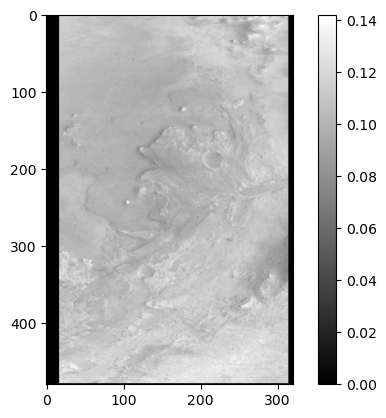

In [7]:
# We can visualize the data
hrl40ff.load()
plt.imshow(hrl40ff.ifdat[:,:,100],cmap='gray')
plt.colorbar()
plt.show()

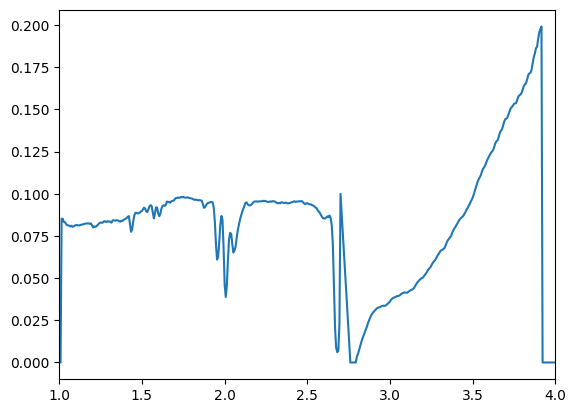

In [45]:
# Example of plotting the spectrum of a pixel of raw data
plt.plot(hrl40ff.meanwvl,hrl40ff.ifdat[100,100,:])
plt.xlim([1,4.0])
plt.show()

In [23]:
%%time
# photometric correction and atmospheric correction witout output
hrl40ff.crism_corr()

# photometric correction and atmospheric correction with output, if output is None, it will save the output to the same directory as the input file
#hrl16cfe.crism_corr_save(output=None)


<> Photometric Correction Processing
<> Atmospheric Correction Processing
<> Correction Finished
CPU times: total: 4.72 s
Wall time: 4.81 s


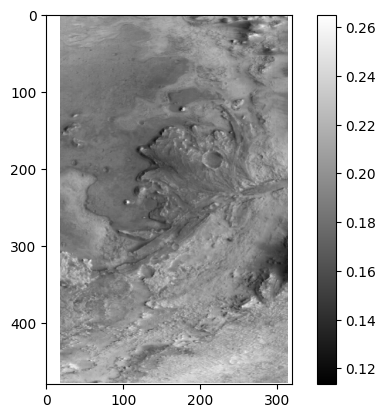

In [46]:
# visualize the corrected data
plt.imshow(hrl40ff.ifdat_corr[:,:,150],cmap='gray')
plt.colorbar()
plt.show()

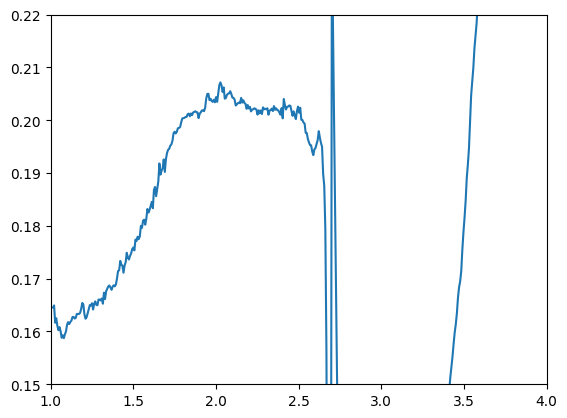

In [47]:
# Example of plotting the spectrum of a pixel of corrected data
plt.plot(hrl40ff.meanwvl,hrl40ff.ifdat_corr[300,200,:])
plt.xlim([1,4.0])
plt.ylim([0.15,0.22])
plt.show()

In [ ]:
# output CRISM project corr data, it will save the output to the same directory as the input file
hrl40ff.project_crism()

In [37]:
# Calculate the summary product of Viviano et al., (2014)
hrl40ff.summaryproduct()

#hrl16cfe.project_summaryproduct()

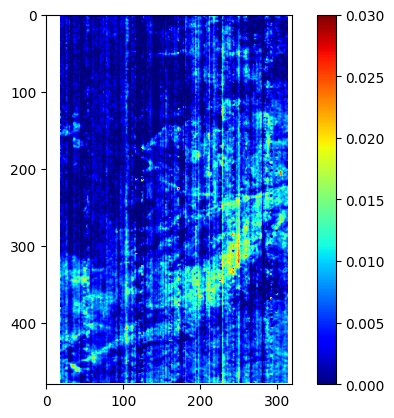

In [52]:
# visualize the summary product BD2290
plt.imshow(hrl40ff.BD2290(),cmap='jet',vmin=0,vmax=0.03)
plt.colorbar()
plt.show()

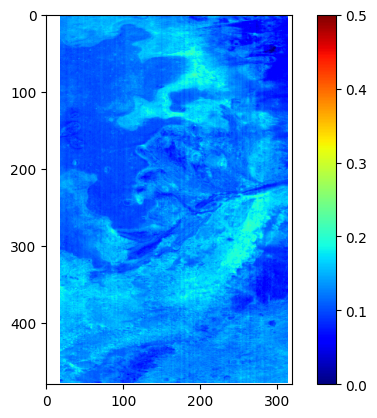

In [59]:
# visualize the summary product BD2290
plt.imshow(hrl40ff.OLINDEX3(),cmap='jet',vmin=0,vmax=0.5)
plt.colorbar()
plt.show()